# Learning goal 1: performing model evaluations

## Background

I chose this learning goal to understand more about how models work and how they can be compared against each other. The original aim of this learning goal was to evaluate the more complex urban wind models that we would use in our research, however these models were mostly proprietary and required large computational power to run. We instead chose to use more simple machine learning models that could use the available data.



## Data sources

The data source that is used in the model evaluations, is the Netatmo dataset that contains all observations of all PWSs. This dataset was then processed in two steps, firstly by 'create-df.py' and then by 'calculatePressureTrends.ipynb'. Both these scripts can be found in the 'preprocessing' folder of the Meteo 1 group. The resulting dataset contains the first 100,000 observations from June 1st, 2017 onwards in a .csv file. Each observation (=row) also contains a set of coordinates that correspond to the coordinates of the PWS that made the observation, as well as the measured pressure differences between the time of the observation and 3, 6, 9, 12, 15, and 18 hours before the observation. Click [here](https://wageningenur4-my.sharepoint.com/:x:/g/personal/toon_meijer_wur_nl/Eab3NStzo59NqcDLhlpLSHgBBrmN41sJZP-PYXn0CEXdoQ?e=B5mzGb) to download the dataset.


## Methodology

To learn more about machine learning models and their evaluation, I first preprocess the data. Then, the data is split up in a trainingset and a testset. Afterwards, three machine learning techniques are trained on the trainingset and then attempt a prediction on the testset. A confusion matrix is used to analyze the performance of each machine learning technique.

## Implementation

Firstly, the data is imported and an extra column is created based on the measured wind speed. This column classifies the wind speed into intervals based on the Beaufort scale. Only values in the category up to 5 are assigned, because there are no observations in the dataset that report wind speeds above category 5. Also, all rows that contain NA-values are removed.

In [1]:
# Importing packages and data
library(caret)
netatmo_pressuretrends <- read.csv('PWS_first100k_withPressureTrends.csv')

netatmo_pressuretrends

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"


timestamp,name,wind_angle,wind_speed_kmh,gust_angle,gust_speed_kmh,rain_mm,pressure,temperature,humidity,x,y,pressure_t3,pressure_t6,pressure_t9,pressure_t12,pressure_t15,pressure_t18
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-06-01 00:00:00,10,311.00000,NA,344.66667,2.000000,NA,1025.100,15.93333,61.00000,4.761691,52.27628,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,106,232.33333,4.000000,326.33333,10.333333,0,1026.533,14.66667,72.00000,4.898516,52.35736,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,107,16.00000,2.000000,27.33333,5.000000,0,1025.267,14.16667,72.66667,4.802288,52.37935,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,109,213.66667,NA,303.33333,2.666667,0,1025.800,15.40000,71.00000,4.831394,52.28069,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,112,207.33333,NA,272.66667,2.000000,0,1026.433,15.20000,64.66667,4.823946,52.43689,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,117,41.00000,2.000000,40.00000,6.333333,0,1025.167,15.63333,68.00000,4.781310,52.34437,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,12,27.66667,NA,44.00000,4.000000,0,1022.967,17.46667,55.66667,4.795101,52.27778,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,131,152.66667,2.000000,141.66667,6.333333,NA,1023.233,15.43333,67.33333,4.920679,52.35885,NA,NA,NA,NA,NA,NA
2017-06-01 00:00:00,133,159.33333,NA,265.33333,2.000000,0,1024.033,13.30000,79.00000,4.726638,52.38318,NA,NA,NA,NA,NA,NA


In [72]:
# Creating Beaufort scale in the data
netatmo_pressuretrends$wind_speed_beaufort <- NA
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh < 1.0] <- 0 
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh >= 1.0 & netatmo_pressuretrends$wind_speed_kmh <= 5.0] <- 1 
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh > 5.0 & netatmo_pressuretrends$wind_speed_kmh <= 11.0] <- 2 
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh > 11 & netatmo_pressuretrends$wind_speed_kmh <= 19] <- 3 
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh > 19 & netatmo_pressuretrends$wind_speed_kmh <= 28] <- 4 
netatmo_pressuretrends$wind_speed_beaufort[netatmo_pressuretrends$wind_speed_kmh > 28 & netatmo_pressuretrends$wind_speed_kmh <= 38] <- 5 

# removing all NA's 
netatmo_pressuretrends_noNA <- na.omit(netatmo_pressuretrends)
netatmo_pressuretrends_noNA


,timestamp,name,wind_angle,wind_speed_kmh,gust_angle,gust_speed_kmh,rain_mm,pressure,temperature,humidity,x,y,pressure_t3,pressure_t6,pressure_t9,pressure_t12,pressure_t15,pressure_t18,wind_speed_beaufort
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1169,2017-06-01 18:30:00,106,40.66667,3.500000,100.00000,10.833333,0,1023.667,22.26667,44.66667,4.898516,52.35736,1.150000,1.150000,3.113333,1.150000,2.766667,2.950000,1
1170,2017-06-01 18:30:00,107,76.50000,2.500000,46.83333,7.166667,0,1022.350,23.08333,43.00000,4.802288,52.37935,1.250000,1.250000,3.083333,1.250000,2.750000,2.933333,1
1171,2017-06-01 18:30:00,109,142.50000,1.333333,145.33333,4.833333,0,1022.917,25.80000,43.33333,4.831394,52.28069,1.150000,1.150000,3.200000,1.150000,2.833333,2.966667,1
1173,2017-06-01 18:30:00,117,167.66667,2.333333,79.50000,9.500000,0,1022.067,25.93333,40.16667,4.781310,52.34437,1.300000,1.300000,3.516667,1.300000,3.116667,3.183333,1
1174,2017-06-01 18:30:00,12,233.66667,1.166667,233.33333,5.500000,0,1019.783,26.60000,46.66667,4.795101,52.27778,1.266667,1.266667,3.416667,1.266667,3.033333,3.050000,1
1177,2017-06-01 18:30:00,145,262.83333,1.166667,269.16667,5.000000,0,1020.050,24.63333,45.33333,4.779267,52.43209,1.233333,1.233333,3.050000,1.233333,2.816667,3.066667,1
1178,2017-06-01 18:30:00,158,20.40000,2.500000,112.60000,7.200000,0,1013.580,25.88333,35.83333,4.852522,52.34474,1.170000,1.170000,3.070000,1.170000,2.820000,2.920000,1
1179,2017-06-01 18:30:00,161,240.83333,1.666667,235.16667,4.833333,0,1014.683,23.65000,51.83333,4.677275,52.30843,1.016667,1.016667,3.316667,1.016667,2.833333,3.116667,1
1180,2017-06-01 18:30:00,181,266.83333,2.166667,206.33333,6.666667,0,1019.567,28.71667,37.33333,4.756874,52.35162,1.400000,1.400000,3.316667,1.400000,3.033333,3.300000,1


Next, the dataset is split up into trainingset and testset. The Beaufort wind speed column is converted from numeric to factors for the machine learning models.

In [75]:
intrain <- createDataPartition(y = netatmo_pressuretrends_noNA$wind_speed_beaufort, p= 0.7, list = FALSE)
training <- netatmo_pressuretrends_noNA[-intrain,]
testing <- netatmo_pressuretrends_noNA[intrain,]
training[["wind_speed_beaufort"]] = factor(training[["wind_speed_beaufort"]])

Below, preparations are made for parallel processing to speed up the machine learning algorithms. All but one core of the host computer are used for processing.

In [44]:
library(doParallel)
cl <- makeCluster(detectCores() - 1)
registerDoParallel(cl)

### Linear Support Vector Machine

As a first machine learning algorithm, a linear support vector machine is used. This is a classification algorithm that works by viewing each datapoint in a space that has the same amount of dimensions as there are predictors. When all datapoints are mapped this way in one space, the algorithm tries to draw a hyperplane dividing datapoints in their classes. The exact location of the hyperplane is determined by maximizing the distance between the closest datapoints at each side of the plane and the hyperplane.

In [45]:
trctrl <- trainControl(method = "repeatedcv", number=5, repeats=2)

svm_Linear <- train(wind_speed_beaufort ~ rain_mm + pressure + temperature + humidity + pressure_t3 + pressure_t6 + pressure_t9 + pressure_t12 + pressure_t15 + pressure_t18, data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [80]:
svm_Linear_pred <- predict(svm_Linear, newdata = testing)

### k-Nearest Neighbour

k-NN is an algorithm that classifies an unknown datapoint by looking at the k most similar datapoints that it is trained on. The algorithm determines the value of k itself by calculating its cross-validation accuracy for different values of k.

In [90]:
knn <- train(wind_speed_beaufort ~ rain_mm + pressure + temperature + humidity + pressure_t3 + pressure_t6 + pressure_t9 + pressure_t12 + pressure_t15 + pressure_t18, data = training, method = "knn",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [82]:
knn_prediction <- predict(knn, newdata = testing)

### Linear Discriminant Analysis


In [63]:
lda <- train(wind_speed_beaufort ~ rain_mm + pressure + temperature + humidity + pressure_t3 + pressure_t6 + pressure_t9 + pressure_t12 + pressure_t15 + pressure_t18, data = training, method = "lda",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"


In [84]:
lda_prediction <- predict(lda, newdata = testing)

In [ ]:
# Stopping all parallel processing
stopCluster(cl)

## Results


### Linear SVM results

In [81]:
confusionMatrix(svm_Linear_pred, as.factor(testing$wind_speed_beaufort))

Warning message in levels(reference) != levels(data):
"longer object length is not a multiple of shorter object length"
Warning message in confusionMatrix.default(svm_Linear_pred, as.factor(testing$wind_speed_beaufort)):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction     1     2     3     4     5
         1 28792  7247  1532   202     2
         2     0     0     0     0     0
         3     0     0     0     0     0
         4     0     0     0     0     0
         5     0     0     0     0     0

Overall Statistics
                                          
               Accuracy : 0.7622          
                 95% CI : (0.7579, 0.7665)
    No Information Rate : 0.7622          
    P-Value [Acc > NIR] : 0.5028          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4  Class: 5
Sensitivity            1.0000   0.0000  0.00000 0.000000 0.000e+00
Specificity            0.0000   1.0000  1.00000 1.000000 1.000e+00
Pos Pred Value         0.7622      NaN      NaN      NaN       NaN
Neg

### k-NN results

In [83]:
confusionMatrix(knn_prediction, as.factor(testing$wind_speed_beaufort))

Warning message in levels(reference) != levels(data):
"longer object length is not a multiple of shorter object length"
Warning message in confusionMatrix.default(knn_prediction, as.factor(testing$wind_speed_beaufort)):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction     1     2     3     4     5
         1 28257  6614  1353   183     2
         2   524   617   166    18     0
         3    11    16    13     1     0
         4     0     0     0     0     0
         5     0     0     0     0     0

Overall Statistics
                                         
               Accuracy : 0.7647         
                 95% CI : (0.7604, 0.769)
    No Information Rate : 0.7622         
    P-Value [Acc > NIR] : 0.1266         
                                         
                  Kappa : 0.0901         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2  Class: 3 Class: 4  Class: 5
Sensitivity           0.98142  0.08514 0.0084856 0.000000 0.000e+00
Specificity           0.09251  0.97681 0.9992274 1.000000 1.000e+00
Pos Pred Value        0.77610  0.46566 0.3170732      NaN       NaN
Neg Pred

### Linear Discriminant Analysis results

In [85]:
confusionMatrix(lda_prediction, as.factor(testing$wind_speed_beaufort))

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3     4     5
         1 28792  7246  1532   202     2
         2     0     0     0     0     0
         3     0     1     0     0     0
         4     0     0     0     0     0
         5     0     0     0     0     0

Overall Statistics
                                          
               Accuracy : 0.7622          
                 95% CI : (0.7579, 0.7665)
    No Information Rate : 0.7622          
    P-Value [Acc > NIR] : 0.5028          
                                          
                  Kappa : 1e-04           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                      Class: 1 Class: 2  Class: 3 Class: 4  Class: 5
Sensitivity          1.0000000   0.0000 0.000e+00 0.000000 0.000e+00
Specificity          0.0001113   1.0000 1.000e+00 1.000000 1.000e+00
Pos Pred Value       0.7622174      NaN 0.000e+00      NaN      

## Conclusion

As can be seen in all three confusion matrices above, the prediction accuracy seems quite high each time. This is because the data is heavily skewed towards one category of Beaufort wind force, namely category 1. The vast majority of measurements is done in light winds, because it is most often not very windy. This can be seen in the wind speed category histogram below.

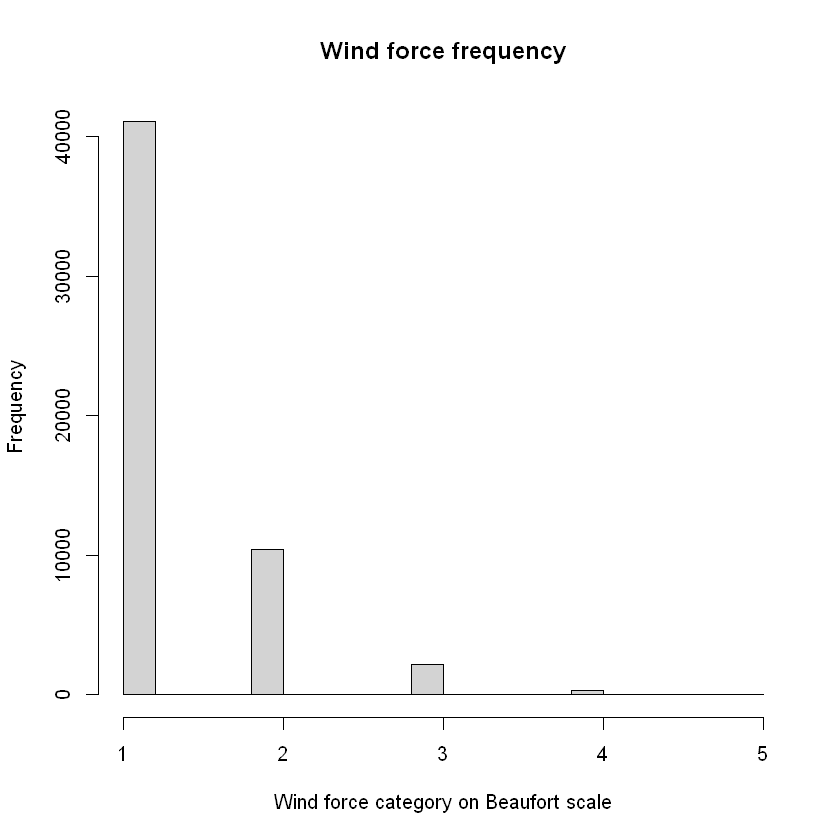

In [88]:
hist(netatmo_pressuretrends_noNA$wind_speed_beaufort, xlab="Wind force category on Beaufort scale", main="Wind force frequency")

This makes that some algorithms such as LDA and Linear SVM (almost) always simply predict category 1 wind speeds. The Kappa score, indicating the degree of chance agreement between the reference value and the prediction value, is also zero and very close to zero in both cases, suggesting hardly any correlation. Only the k-NN algorithm seems able to somewhat predict wind speed categories. Its accuracy is marginally higher and it obtains a Kappa score of nearly 0.09. It seems that by looking at points that closely resemble an input point in the testset, one can obtain the most accurate class result, although this result is still quite poor.


Overall, I learned different things than what I was expecting to learn when I determined my learning goal, but I still learned very relevant concepts. Using multiple prediction algorithms on the same dataset clearly showed different results, and it was interesting to discover where these prediction differences came from. Also, learning about confusion matrices and kappa scores will be very useful for future model evaluations.